# Linear Regression


### **강의자: DSL 5기 허유진**

모델링에 필요한 모듈을 import하고 데이터를 불러온다. head()와 describe()를 이용해 데이터의 전반적인 특징을 파악하고, 전체 column의 개수와 변수 종류를 확인한다.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
airbnb_data = pd.read_csv('/content/drive/My Drive/data/airbnb_linear_regression.csv')
pd.set_option('display.max_columns',None)
airbnb_data

,Unnamed: 0,log_price,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,bed_type,amenities_num,description_len,도심의_중심위치로부터의_거리,원가격,도시별평균가격,price_ratio,log_price_ratio
0,5689,3.806662,House,Entire home/apt,2,1.0,strict,True,NYC,t,f,1.00,f,48,92.0,1.0,1.0,Bed,0,573,0.893681,45.0,142.604285,31.555854,3.451759
1,6316,5.521461,House,Entire home/apt,4,2.0,moderate,False,NYC,t,t,1.00,f,24,95.0,2.0,2.0,Bed,0,1002,6.594267,250.0,142.604285,175.310300,5.166558
2,9358,4.976734,Apartment,Entire home/apt,3,1.0,moderate,True,LA,t,f,0.98,f,122,92.0,1.0,1.0,Bed,0,1000,21.522340,145.0,140.122352,103.480992,4.639388
3,13124,4.477337,Apartment,Entire home/apt,3,1.0,flexible,False,NYC,t,t,0.38,f,12,90.0,1.0,1.0,Bed,0,119,3.602401,88.0,142.604285,61.709226,4.122433
4,14187,5.298317,Apartment,Entire home/apt,7,2.0,flexible,False,NYC,t,f,1.00,f,12,100.0,4.0,4.0,Bed,0,256,7.633463,200.0,142.604285,140.248240,4.943414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27263,70306,4.317488,Other,Entire home/apt,2,1.0,strict,True,LA,t,t,1.00,f,148,96.0,0.0,1.0,Other,20,1000,19.265527,75.0,140.122352,53.524651,3.980142
27264,71212,5.075174,Other,Entire home/apt,6,2.5,strict,True,DC,t,t,1.00,f,67,97.0,2.0,3.0,Other,35,1000,7.065503,160.0,137.181602,116.633716,4.759038
27265,72286,4.262680,Other,Entire home/apt,2,1.0,moderate,True,LA,t,t,1.00,f,19,99.0,1.0,1.0,Other,14,1000,6.188412,71.0,140.122352,50.670003,3.925334
27266,72753,4.248495,Other,Private room,1,1.0,strict,True,NYC,t,t,1.00,f,11,100.0,1.0,1.0,Other,27,1000,8.899566,70.0,142.604285,49.086884,3.893592


In [ ]:
# 다중 선형 회귀분석

import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols(formula='log_price_ratio ~ accommodates + bathrooms + host_response_rate + bedrooms + beds + amenities_num + description_len + 도심의_중심위치로부터의_거리', data=airbnb_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_price_ratio   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2188.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:40:18   Log-Likelihood:                -19194.
No. Observations:               27268   AIC:                         3.841e+04
Df Residuals:                   27259   BIC:                         3.848e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8160      0.031    122.246      0.000       3.755       3.877
accommodates           0.1595      0.003     61.226      0.000       0.154       0.165
bathrooms              0.0225      0.006      3.502      0.000       0.010       0.035
host_response_rate    -0.2429      0.030     -8.124      0.000      -0.301      -0.184
bedrooms               0.1281      0.006     23.252      0.000       0.117       0.139
beds                  -0.0703      0.004    -17.289      0.000      -0.078      -0.062
amenities_num          0.0083      0.000     18.458      0.000       0.007       0.009
description_len     6.735e-05   1.32e-05      5.120      0.000    4.16e-05    9.31e-05
도심의_중심위치로부터의_거리       -0.0023      0.000     -6.384      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      433.217   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              838.585
Skew:                          -0.051   Prob(JB):                    8.01e-183
Kurtosis:                       3.853   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 변수선택법을 이용

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('feature_selection.py','wb').write(src)
import feature_selection

Saving feature_selection.py to feature_selection.py


In [ ]:
import feature_selection as fsel

X = airbnb_data[['accommodates', 'bathrooms', 'host_response_rate', 'number_of_reviews', 'review_scores_rating',
                 'bedrooms', 'beds', 'amenities_num', 'description_len', '도심의_중심위치로부터의_거리']]
y = airbnb_data['log_price_ratio']

In [ ]:
fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : accommodates 	AIC : 39657.667128885456
Entered : review_scores_rating 	AIC : 38505.634695876404
Entered : bedrooms 	AIC : 38108.72326366148
Entered : beds 	AIC : 37866.480163832304
Entered : amenities_num 	AIC : 37730.63486348259
Entered : host_response_rate 	AIC : 37616.890132475855
Entered : 도심의_중심위치로부터의_거리 	AIC : 37561.85516617096
Entered : bathrooms 	AIC : 37552.927517495475
Entered : description_len 	AIC : 37545.67818956854
Entered : number_of_reviews 	AIC : 37539.22397196273
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:        log_price_ratio   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1895.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:          

['intercept',
 'accommodates',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'amenities_num',
 'host_response_rate',
 '도심의_중심위치로부터의_거리',
 'bathrooms',
 'description_len',
 'number_of_reviews']

In [ ]:
fsel.backwardSelection(X, y, model_type='linear', elimination_criteria='bic')

Character Variables (Dummies Generated, First Dummies Dropped): []
                            OLS Regression Results                            
Dep. Variable:        log_price_ratio   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1895.
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        18:45:35   Log-Likelihood:                -18759.
No. Observations:               27268   AIC:                         3.754e+04
Df Residuals:                   27257   BIC:                         3.763e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

['intercept',
 'accommodates',
 'bathrooms',
 'host_response_rate',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'amenities_num',
 'description_len',
 '도심의_중심위치로부터의_거리']

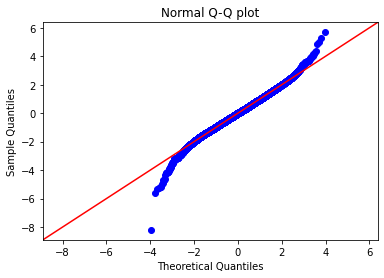

In [ ]:
# 잔차의 정규성 확인

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

sm.qqplot(results.resid, fit=True, line='45')
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
# VIF 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,accommodates,3.868637
1,bathrooms,1.452736
2,host_response_rate,1.019100
3,bedrooms,2.501050
4,beds,3.456018
5,amenities_num,1.114332
6,description_len,1.049468
7,도심의_중심위치로부터의_거리,1.003655


- 다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다.
- 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)
- 해당 분석에서 다중공선성은 없는 것으로 보인다.